In [1]:
import pandas as pd
!pip install --upgrade seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# 데이터 불러오기
df = pd.read_csv('athlete_events.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [46]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [47]:
# 데이터 복사
df_continent = df.copy()

In [48]:
df_continent.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [49]:
# 국가별 코드와 대륙 정보를 딕셔너리로 정리
continent_mapping = {
    'ALG': 'Africa', 'ANG': 'Africa', 'BEN': 'Africa', 'BOT': 'Africa', 'BUR': 'Africa', 'BDI': 'Africa',
    'CMR': 'Africa', 'CPV': 'Africa', 'CAF': 'Africa', 'CHA': 'Africa', 'COM': 'Africa', 'CGO': 'Africa',
    'COD': 'Africa', 'CIV': 'Africa', 'DJI': 'Africa', 'EGY': 'Africa', 'ERI': 'Africa', 'SWZ': 'Africa',
    'ETH': 'Africa', 'GAB': 'Africa', 'GAM': 'Africa', 'GHA': 'Africa', 'GUI': 'Africa', 'GBS': 'Africa',
    'GEQ': 'Africa', 'KEN': 'Africa', 'LES': 'Africa', 'LBR': 'Africa', 'LBA': 'Africa', 'MAD': 'Africa',
    'MAW': 'Africa', 'MLI': 'Africa', 'MAR': 'Africa', 'MRI': 'Africa', 'MTN': 'Africa', 'MOZ': 'Africa',
    'NAM': 'Africa', 'NIG': 'Africa', 'NGR': 'Africa', 'UGA': 'Africa', 'RWA': 'Africa', 'STP': 'Africa',
    'SEN': 'Africa', 'SEY': 'Africa', 'SLE': 'Africa', 'SOM': 'Africa', 'RSA': 'Africa', 'SSD': 'Africa',
    'SUD': 'Africa', 'TAN': 'Africa', 'TOG': 'Africa', 'TUN': 'Africa', 'ZAM': 'Africa', 'ZIM': 'Africa',
    'ANT': 'America', 'ARG': 'America', 'ARU': 'America', 'BAH': 'America', 'BAR': 'America', 'BIZ': 'America',
    'BER': 'America', 'BOL': 'America', 'BRA': 'America', 'CAY': 'America', 'CAN': 'America', 'CHI': 'America',
    'COL': 'America', 'CRC': 'America', 'CUB': 'America', 'DOM': 'America', 'DMA': 'America', 'ESA': 'America',
    'ECU': 'America', 'GRN': 'America', 'GUA': 'America', 'GUY': 'America', 'HAI': 'America', 'HON': 'America',
    'JAM': 'America', 'MEX': 'America', 'NCA': 'America', 'PAN': 'America', 'PAR': 'America', 'PER': 'America',
    'PUR': 'America', 'SKN': 'America', 'LCA': 'America', 'VIN': 'America', 'SUR': 'America', 'TTO': 'America',
    'USA': 'America', 'URU': 'America', 'VEN': 'America', 'IVB': 'America', 'ISV': 'America',
    'AFG': 'Asia', 'BRN': 'Asia', 'BAN': 'Asia', 'BHU': 'Asia', 'BRU': 'Asia', 'CAM': 'Asia', 'CHN': 'Asia',
    'KOR': 'Asia', 'HKG': 'Asia', 'IND': 'Asia', 'INA': 'Asia', 'IRI': 'Asia', 'IRQ': 'Asia', 'JPN': 'Asia',
    'JOR': 'Asia', 'KAZ': 'Asia', 'KGZ': 'Asia', 'KUW': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MAS': 'Asia',
    'MDV': 'Asia', 'MGL': 'Asia', 'MYA': 'Asia', 'NEP': 'Asia', 'OMA': 'Asia', 'PAK': 'Asia', 'PLE': 'Asia',
    'PHI': 'Asia', 'QAT': 'Asia', 'PRK': 'Asia', 'KSA': 'Asia', 'SGP': 'Asia', 'SRI': 'Asia', 'SYR': 'Asia',
    'TJK': 'Asia', 'TPE': 'Asia', 'THA': 'Asia', 'TLS': 'Asia', 'TKM': 'Asia', 'UAE': 'Asia', 'UZB': 'Asia',
    'VIE': 'Asia', 'YEM': 'Asia',
    'ALB': 'Europe', 'AND': 'Europe', 'ARM': 'Europe', 'AUT': 'Europe', 'AZE': 'Europe', 'BEL': 'Europe',
    'BIH': 'Europe', 'BUL': 'Europe', 'CYP': 'Europe', 'CRO': 'Europe', 'CZE': 'Europe', 'DEN': 'Europe',
    'ESP': 'Europe', 'EST': 'Europe', 'FIN': 'Europe', 'FRA': 'Europe', 'GEO': 'Europe', 'GER': 'Europe',
    'GBR': 'Europe', 'GRE': 'Europe', 'HUN': 'Europe', 'IRL': 'Europe', 'ISL': 'Europe', 'ISR': 'Europe',
    'ITA': 'Europe', 'KOS': 'Europe', 'LAT': 'Europe', 'LIE': 'Europe', 'LTU': 'Europe', 'LUX': 'Europe',
    'MKD': 'Europe', 'MLT': 'Europe', 'MDA': 'Europe', 'MON': 'Europe', 'MNE': 'Europe', 'NED': 'Europe',
    'NOR': 'Europe', 'POL': 'Europe', 'POR': 'Europe', 'ROU': 'Europe', 'SMR': 'Europe', 'SRB': 'Europe',
    'SVK': 'Europe', 'SLO': 'Europe', 'SWE': 'Europe', 'SUI': 'Europe', 'TUR': 'Europe', 'UKR': 'Europe',
    'ASA': 'Oceania', 'AUS': 'Oceania', 'COK': 'Oceania', 'FIJ': 'Oceania', 'GUM': 'Oceania', 'KIR': 'Oceania',
    'MHL': 'Oceania', 'FSM': 'Oceania', 'NRU': 'Oceania', 'NZL': 'Oceania', 'PLW': 'Oceania', 'PNG': 'Oceania',
    'SOL': 'Oceania', 'SAM': 'Oceania', 'TGA': 'Oceania', 'TUV': 'Oceania', 'VAN': 'Oceania'
}

In [56]:
# 새로운 대륙 컬럼을 추가하고 NOC 코드에 따른 대륙을 매핑
df_continent['Continent'] = df_continent['NOC'].map(continent_mapping)

In [57]:
df_continent.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe


In [58]:
# 개체 연도별 순서별로 저장
df_yearSorted = df_continent.sort_values(by='Year')
df_yearSorted.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
113748,57619,Birger Gabriel Karlsson,M,25.0,188.0,88.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxed Fours,NaN,Europe
217643,109319,Martin Sharp,M,35.0,NaN,NaN,Titia,GBR,1952 Summer,1952,Summer,Helsinki,Sailing,Sailing Mixed 6 metres,NaN,Europe
186646,93823,Ernst Erich Otto Peters,M,32.0,NaN,NaN,Sweden,SWE,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,NaN,Europe
150400,75453,Konstantin Aleksandrovich Martazov,M,NaN,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN,NaN
217640,109317,John Arthur Sharp,M,21.0,NaN,NaN,Canada,CAN,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxed Eights,NaN,America


In [59]:
# 최근 1960년 이전 기록 삭제
df_continent = df_continent[df_continent['Year']>1960]
df_continent.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe


In [55]:
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224864 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         224864 non-null  int64  
 1   Name       224864 non-null  object 
 2   Sex        224864 non-null  object 
 3   Age        222834 non-null  float64
 4   Height     202827 non-null  float64
 5   Weight     202115 non-null  float64
 6   Team       224864 non-null  object 
 7   NOC        224864 non-null  object 
 8   Games      224864 non-null  object 
 9   Year       224864 non-null  int64  
 10  Season     224864 non-null  object 
 11  City       224864 non-null  object 
 12  Sport      224864 non-null  object 
 13  Event      224864 non-null  object 
 14  Medal      30476 non-null   object 
 15  Continent  199417 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 29.2+ MB


In [61]:
# 메달 점수 매핑 딕셔너리 생성
medal_points = {
    'Gold': 3,    # 금메달 3점
    'Silver': 2,  # 은메달 2점
    'Bronze': 1,  # 동메달 1점
    'NA': None  # None 값을 그대로 유지
}

In [62]:
# 'Medal' 컬럼의 값을 점수로 변환하여 'Points' 컬럼에 추가
df_continent['Points'] = df_continent['Medal'].map(medal_points)

In [85]:
df_continent.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent,Points
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN


In [65]:
df_total_points = df_continent.groupby(['Continent', 'Sport'])['Points'].sum().reset_index()

# 각 대륙별로 점수 합계가 높은 상위 10개 종목 추출
df_top_10_sports_by_continent = df_total_points.groupby('Continent').apply(lambda x: x.nlargest(10, 'Points')).reset_index(drop=True)

# 결과 확인
print(df_top_10_sports_by_continent)

   Continent                      Sport  Points
0     Africa                  Athletics   512.0
1     Africa                   Football   172.0
2     Africa                   Swimming    61.0
3     Africa                     Boxing    52.0
4     Africa                     Hockey    45.0
5     Africa                     Rowing    18.0
6     Africa               Rugby Sevens    13.0
7     Africa                  Taekwondo    12.0
8     Africa                       Judo     6.0
9     Africa                  Wrestling     6.0
10   America                   Swimming  2232.0
11   America                  Athletics  1832.0
12   America                 Ice Hockey   974.0
13   America                 Basketball   837.0
14   America                   Football   752.0
15   America                 Volleyball   648.0
16   America                     Rowing   644.0
17   America                   Baseball   404.0
18   America                     Boxing   362.0
19   America                    Sailing 

<ipython-input-65-5a6ffe6c3161>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10_sports_by_continent = df_total_points.groupby('Continent').apply(lambda x: x.nlargest(10, 'Points')).reset_index(drop=True)


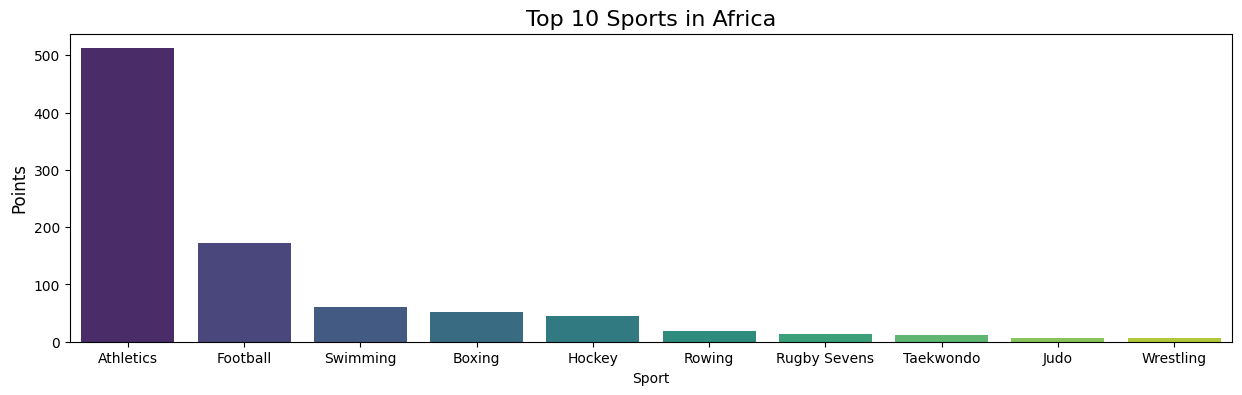

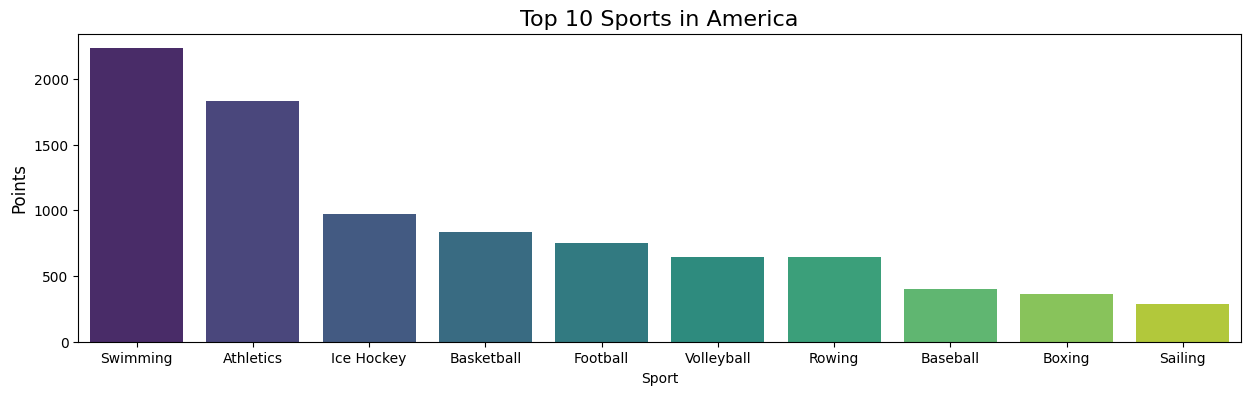

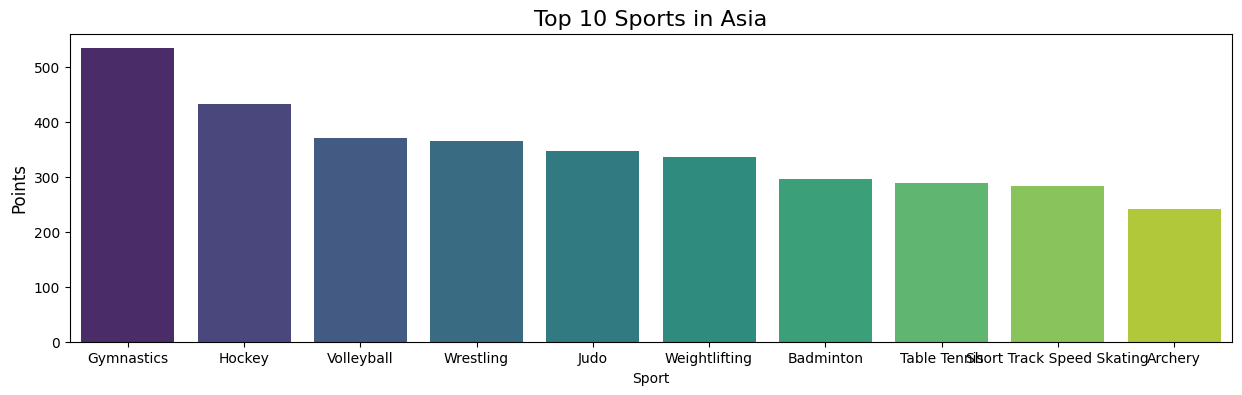

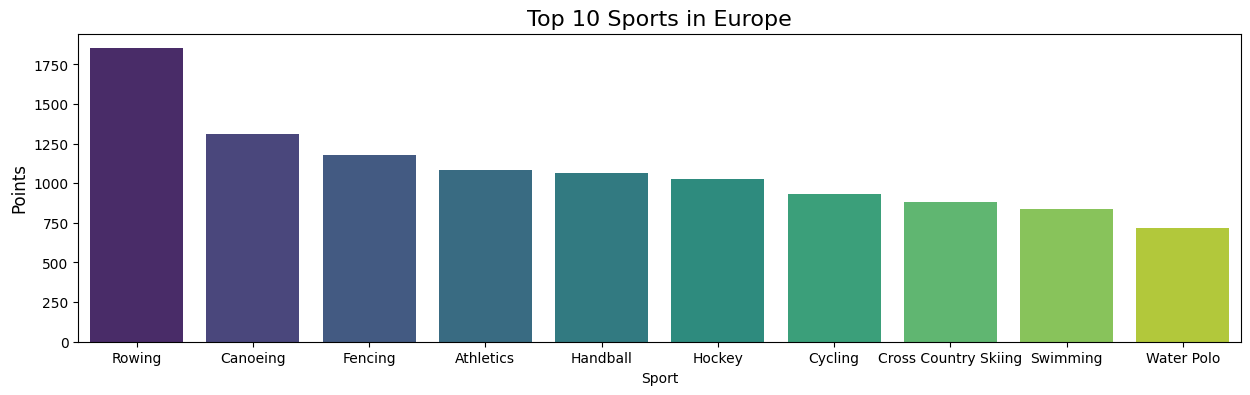

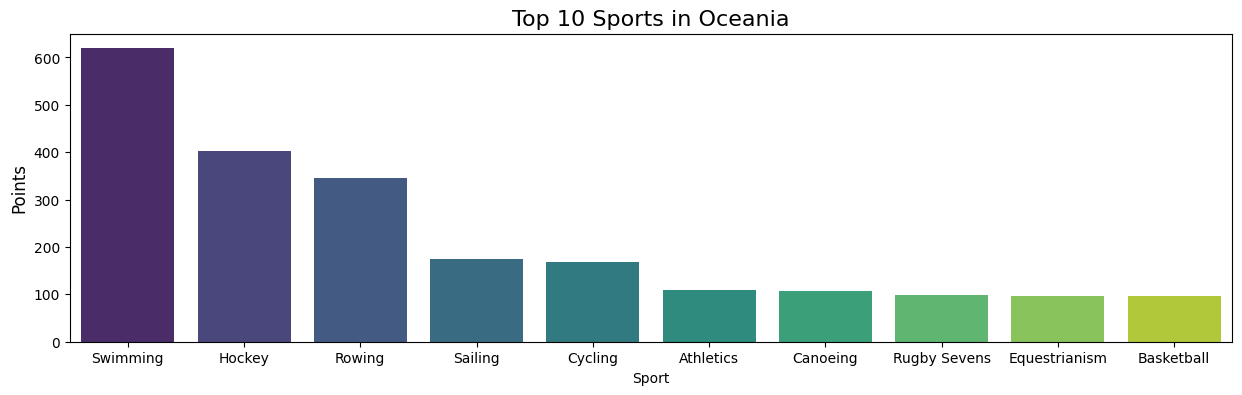

In [92]:
continents = df_top_10_sports_by_continent['Continent'].unique()

# 대륙별로 그래프 그리기
for continent in continents:
    # 해당 대륙의 데이터만 필터링
    df_continent_data = df_top_10_sports_by_continent[df_top_10_sports_by_continent['Continent'] == continent]

    # 그래프 그리기
    plt.figure(figsize=(15, 4))
    sns.barplot(x='Sport', y='Points', data=df_continent_data, palette='viridis')

    # 그래프 제목과 축 레이블 설정
    plt.title(f'Top 10 Sports in {continent}', fontsize=16)
    plt.xlabel('Sport', fontsize=10)
    plt.ylabel('Points', fontsize=12)

    # 그래프 보여주기
    plt.show()